## Introduction

**Context**
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

**Content**
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period. \
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.


## Imports

In [1372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,7]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 14

## Load The Data

In [915]:
df = pd.read_csv('dataset/FAO.csv',encoding = 'cp1254')

In [916]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [917]:
df.shape

(21477, 63)

## Data Summary

In [918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [919]:
#change the data type of Y2012 and Y2013 to float
df[['Y2012','Y2013']] = df[['Y2012','Y2013']].astype('float')

In [920]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area Code,21477.0,125.449411,72.868149,1.0,63.00,120.00,188.00,276.00
Item Code,21477.0,2694.211529,148.973406,2511.0,2561.00,2640.00,2782.00,2961.00
Element Code,21477.0,5211.687154,146.820079,5142.0,5142.00,5142.00,5142.00,5521.00
latitude,21477.0,20.450613,24.628336,-40.9,6.43,20.59,41.15,64.96
longitude,21477.0,15.794445,66.012104,-172.1,-11.78,19.15,46.87,179.41
Y1961,17938.0,195.262069,1864.124336,0.0,0.00,1.00,21.00,112227.00
Y1962,17938.0,200.782250,1884.265591,0.0,0.00,1.00,22.00,109130.00
Y1963,17938.0,205.464600,1861.174739,0.0,0.00,1.00,23.00,106356.00
Y1964,17938.0,209.925577,1862.000116,0.0,0.00,1.00,24.00,104234.00
Y1965,17938.0,217.556751,2014.934333,0.0,0.00,1.00,25.00,119378.00


**In the years 2012 and 2013, the min values of production are negative, which is abnormal. We are given that the production data here is including domestic production and imports, so the negative production may imply that the corresponding food or feed item is mainly supported by imports. 
<br/> 
<br/> 
In addition, at least 25% of production data across every year have 0 values. Remind that each row represents the production of a certain food or feed in an Area. These 0 production values tell that different areas produce or consume different kinds of food and feed items, which might depend on their food culture, climate, economy, and other factors. Let's find out these negative values anyway.**

In [1400]:
df[(df.Y2012 < 0) | (df.Y2013 < 0)]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10082,JPN,110,Japan,2516,Oats,5142,Food,36.2,138.25,0.0,...,44.0,44.0,42.0,47.0,46.0,47.0,47.0,51.0,-169.0,-246.0


**The negative values are Oats production in Japan in the years 2012 and 2013, but we can also see that the production of oats prior to 2012 are just around 40000 tones,which is not big comparing to its large population. Oats is apparently not the main crop in Japan.** 

In [921]:
df.Item.unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [922]:
df.Item.nunique()

115

**There are 114 kind of unique food and feed items in our data set.**

<br/>
<br/>


## Drop Unecessary Row And Columns

In [923]:
#remove rows where more than a half of prodcution records are null
null_rows = df.iloc[:,9:].isnull().sum(axis = 1) > 26
df = df.loc[~null_rows]

In [924]:
#number of rows with null values
df.isnull().sum(axis = 1).sum()

0

In [925]:
df.Unit.unique()

array(['1000 tonnes'], dtype=object)

In [926]:
#Drop column unit since there is only one unit
df.drop('Unit',axis = 1,inplace = True)

## Produciton Of Worldwide Level

### Food and Feed Production From Year 1961-2013

In [927]:
world_food = df.iloc[:,9:].loc[df.Element == 'Food'].sum(axis = 0)
world_feed = df.iloc[:,9:].loc[df.Element == 'Feed'].sum(axis = 0)

Text(0.5, 1.0, 'Food And Feed Production Form Year 1961-2013')

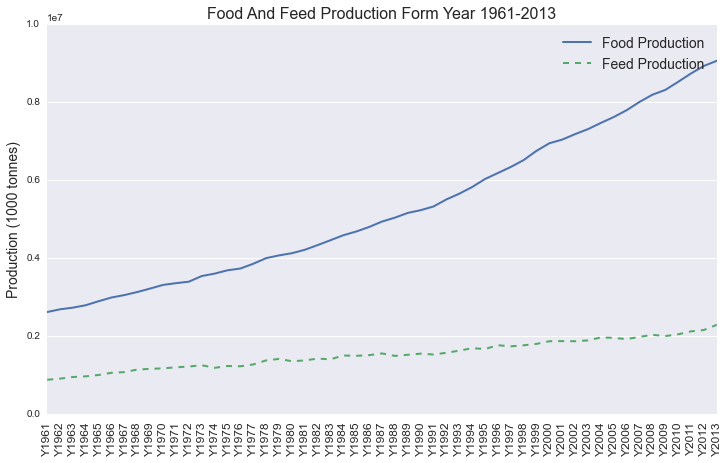

In [1402]:
plt.plot(world_food,label = 'Food Production',linewidth = 2)
plt.plot(world_feed,label = 'Feed Production',linestyle='dashed',linewidth = 2)
plt.xticks(rotation = 90,fontsize = 12)
plt.ylabel('Production (1000 tonnes)',fontsize = 14)
plt.legend()

plt.title('Food And Feed Production Form Year 1961-2013')

**We can easily see that the total consumption or production is growing over the time. Especially, the food produciton seems to grow more rapidly.** 

<br/>
<br/>


### Top 10 Food Produced / Consumed Of All Time

Text(0, 0.5, 'Food Items')

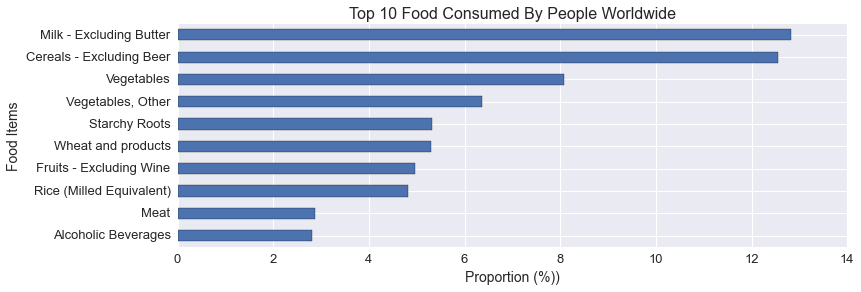

In [929]:
ts_food_item = df[df.Element == 'Food'].groupby('Item').sum().iloc[:,5:]

ax = (ts_food_item.sum(1)/ts_food_item.sum(1).sum(0) * 100) \
                            .sort_values()[-10:] \
                            .plot(kind = 'barh',figsize = (12,4),title = 'Top 10 Food Consumed By People Worldwide',fontsize = 13)
ax.set_xlabel('Proportion (%))',fontsize = 14)
ax.set_ylabel('Food Items',fontsize =14)

**The Milk(Excluding Butter) and Cereals (excluding beer) are the leading food all over the world, accountting for more than 24% of the total food production. Meat production ranks 9th among all food items. We can infer that majority of population worldwide live primarily on a plant-based diet. 
<br/>
It's surprising that Alcoholic Beverages production ranks 10th, where it accounts for near 3% of the total food production.
<br/>
Though the comparision of these food items is based on their total weights, it's unfair to say 1 tone of milk is equivalent to 1 tone of cereal, vice versa.**
<br/>
<br/>



### Top 10 Feed Produced/Consumed Of All Time

Text(0, 0.5, 'Feed Items')

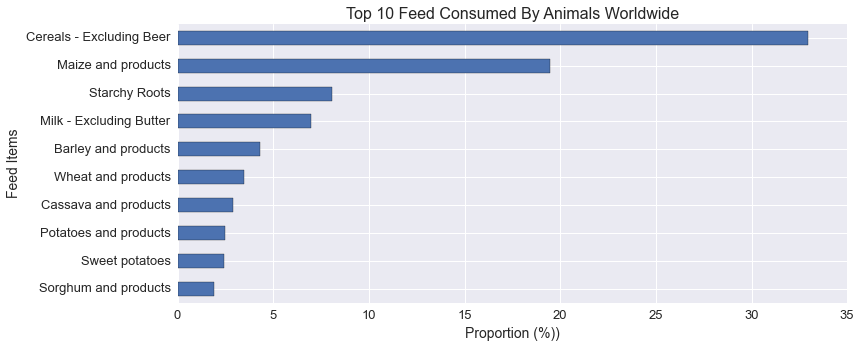

In [930]:
ts_feed_item = df[df.Element == 'Feed'].groupby('Item').sum().iloc[:,5:]

ax = (ts_feed_item.sum(1)/ts_feed_item.sum(1).sum(0) * 100) \
                            .sort_values()[-10:] \
                            .plot(kind = 'barh',figsize = (12,5),title = 'Top 10 Feed Consumed By Animals Worldwide',fontsize = 13)

ax.set_xlabel('Proportion (%))',fontsize = 14)
ax.set_ylabel('Feed Items',fontsize =14)

**Cereals (Excluding Beer) and Maize and its products are the most consumed by animals especilly livestock.**
<br/>
<br/>


### Top 5 Food Items With Highest Average Growth Rate Over The Last 10 Years

**Eating Habit is very likely to change over time. It can be affected by many factors such as local economic environment, globalization of trade. We have been explored the accumulated food and feed prodcution above and let's check out which kind of food and feed are trending in the last 10 years.**

In [1427]:
ts_food_item_trans = ts_food_item.transpose()
ts_food_item_trans.index = pd.to_datetime(ts_food_item_trans.index.str.replace('Y',''),format= '%Y')

#average growth rate every decade
avg_pct_change_dec = ts_food_item_trans.groupby(ts_food_item_trans.index.year // 10).mean().pct_change() * 100
#the average growth rate last decade
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)

Item
Miscellaneous            66.093535
Infant food              66.093535
Sugar beet               53.179191
Spices, Other            47.076085
Citrus, Other            44.593186
                           ...    
Palm kernels            -11.971831
Sweet potatoes          -15.013078
Fish, Body Oil          -40.089358
Cottonseed                     NaN
Meat, Aquatic Mammals          NaN
Name: 201, Length: 115, dtype: float64

**There are two abnormal values. Let's find out the production
of the corresponding items.**

In [1428]:
ts_food_item_trans[['Cottonseed','Meat, Aquatic Mammals']]

Item,Cottonseed,"Meat, Aquatic Mammals"
1961-01-01,0.0,0.0
1962-01-01,0.0,0.0
1963-01-01,0.0,0.0
1964-01-01,0.0,0.0
1965-01-01,0.0,0.0
1966-01-01,0.0,0.0
1967-01-01,0.0,0.0
1968-01-01,0.0,0.0
1969-01-01,0.0,0.0
1970-01-01,0.0,0.0


**Except in 1985, the total production of cotton seed was 0, we should expect that the need of cotton seed in the following years is 0 too.
<br/>
The production of Meat, Aquatic Mammals was 0 over the years. We can remove rows of these two food items.**

In [1429]:
df = df[~((df.Element == 'Food') & ((df.Item == 'Meat, Aquatic Mammals') | (df.Item == 'Cottonseed')))]

**Except in year of 2013, the Olive Oil Production is 0, so we get a inifnite growth rate.**

Text(0, 0.5, 'Growth Rate (%)')

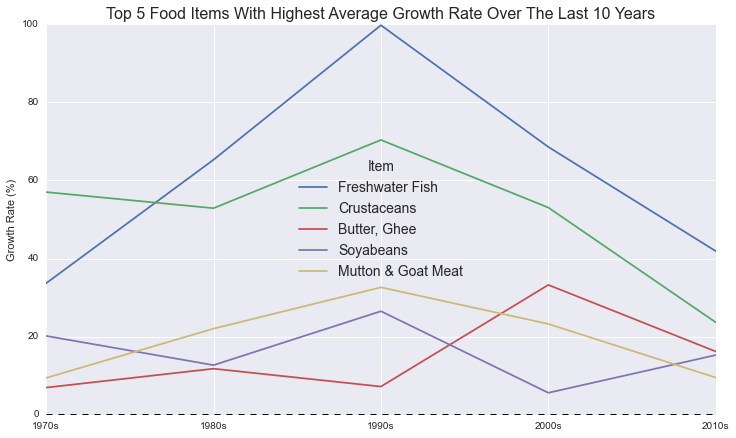

In [1430]:
fig, ax = plt.subplots(1, 1)

avg_pct_change_dec.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Top 5 Food Items With Highest Average Growth Rate Over The Last 10 Years',
                      ax = ax)

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_xticks(avg_pct_change_dec.index[1:])
ax.set_xticklabels(['1970s','1980s','1990s','2000s','2010s'])
ax.set_ylabel('Growth Rate (%)')

**Freshwater Fish has a dramatic growth rate more than 100% in 1990s and reduced to 40% in 2010s, which is still a high growth rate. According to the organiztion of World Wildlife,the Freshwater fish populations are collapsing. Nearly 1/3 of all freshwater fish are threatened with extinction. Countries and fishery companies should be alerted to this and consider whether it is possible to reduce the threat to wild freshwater fish ecology through industrial transformation or breeding.**

Text(0, 0.5, 'Prodcution (1000 tones)')

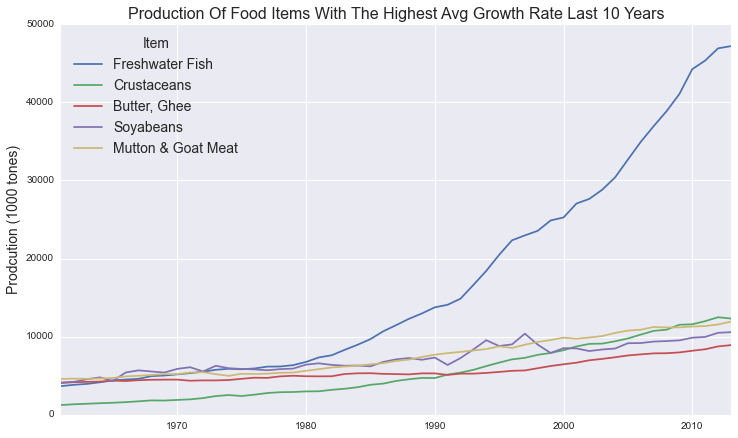

In [1431]:
ax = ts_food_item_trans.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Production Of Food Items With The Highest Avg Growth Rate Last 10 Years')

ax.set_ylabel('Prodcution (1000 tones)',fontsize = 14)

**As we can see, the prodcutin of Freashwater Fish has been incrasing sharply after 1990.**
<br/>
<br/>

### Top 5 Feed Items With Highest Average Growth Rate Over The Last 10 Years

In [1440]:
ts_feed_item_trans = ts_feed_item.transpose()
ts_feed_item_trans.index = pd.to_datetime(ts_feed_item_trans.index.str.replace('Y',''),format= '%Y')

#average growth rate every decade
avg_pct_change_dec = ts_feed_item_trans.groupby(ts_feed_item_trans.index.year // 10).mean().pct_change() * 100
#the average growth rate last decade
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)

Item
Olive Oil                              inf
Freshwater Fish                 626.585014
Crustaceans                     228.413284
Butter, Ghee                    110.000000
Soyabeans                        73.696682
                                   ...    
Olives (including preserved)           NaN
Palm Oil                               NaN
Poultry Meat                           NaN
Stimulants                             NaN
Tea (including mate)                   NaN
Name: 201, Length: 82, dtype: float64

**Still,there are some null and ininite growth rate here. Let's take a look at the corresponding feed items**

In [1441]:
abnoraml_vals = avg_pct_change_dec.columns[avg_pct_change_dec.iloc[-1].isna()].tolist()
abnoraml_vals.append('Olive Oil')

In [1442]:
ts_feed_item_trans.loc[:,abnoraml_vals]

Item,Grapefruit and products,Grapes and products (excl wine),Honey,"Oilcrops Oil, Other",Olives (including preserved),Palm Oil,Poultry Meat,Stimulants,Tea (including mate),Olive Oil
1961-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1967-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Except in the year 2013,the values of Oilve Oil are 0s. The rest feed items have all 0 values over time, so we can remove this feed items.**

In [1443]:
df = df[~((df.Element == 'Feed') & df.Item.isin(abnoraml_vals))]

In [1444]:
#top 5 food items with the highest average growth rate over the last 10 years
top5_avg_pct_change = avg_pct_change_dec.iloc[-1].sort_values(ascending = False)[1:6]
top5_avg_pct_change

Item
Freshwater Fish       626.585014
Crustaceans           228.413284
Butter, Ghee          110.000000
Soyabeans              73.696682
Mutton & Goat Meat     73.469388
Name: 201, dtype: float64

Text(0, 0.5, 'Growth Rate (%)')

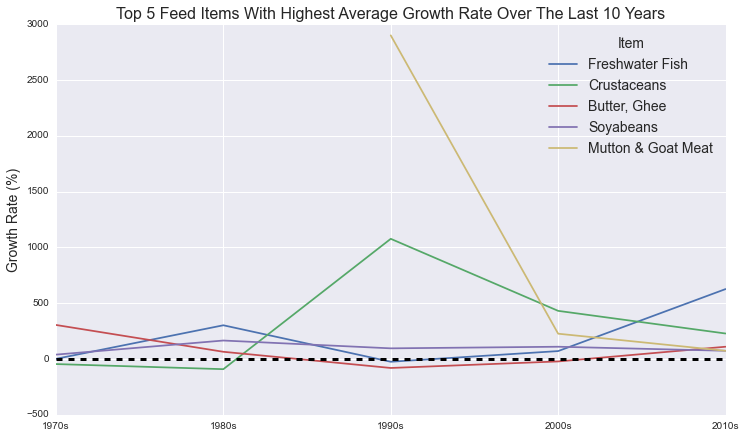

In [1445]:
fig, ax = plt.subplots(1, 1)

avg_pct_change_dec.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Top 5 Feed Items With Highest Average Growth Rate Over The Last 10 Years',
                      ax = ax)

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_xticks(avg_pct_change_dec.index[1:])
ax.set_xticklabels(['1970s','1980s','1990s','2000s','2010s'])
ax.set_ylabel('Growth Rate (%)',fontsize = 14)

In [972]:
ts_feed_item_trans['Mutton & Goat Meat']

1961-01-01     0.0
1962-01-01     0.0
1963-01-01     0.0
1964-01-01     0.0
1965-01-01     0.0
1966-01-01     0.0
1967-01-01     0.0
1968-01-01     0.0
1969-01-01     0.0
1970-01-01     0.0
1971-01-01     0.0
1972-01-01     0.0
1973-01-01     0.0
1974-01-01     0.0
1975-01-01     0.0
1976-01-01     0.0
1977-01-01     0.0
1978-01-01     0.0
1979-01-01     0.0
1980-01-01     0.0
1981-01-01     0.0
1982-01-01     0.0
1983-01-01     0.0
1984-01-01     0.0
1985-01-01     0.0
1986-01-01     0.0
1987-01-01     0.0
1988-01-01     1.0
1989-01-01     0.0
1990-01-01     0.0
1991-01-01     2.0
1992-01-01     3.0
1993-01-01     3.0
1994-01-01     3.0
1995-01-01     3.0
1996-01-01     3.0
1997-01-01     4.0
1998-01-01     5.0
1999-01-01     4.0
2000-01-01     7.0
2001-01-01     7.0
2002-01-01     8.0
2003-01-01     9.0
2004-01-01    10.0
2005-01-01    10.0
2006-01-01    13.0
2007-01-01    11.0
2008-01-01    11.0
2009-01-01    12.0
2010-01-01    16.0
2011-01-01    17.0
2012-01-01    17.0
2013-01-01  

Text(0, 0.5, 'Prodcution (1000 tones)')

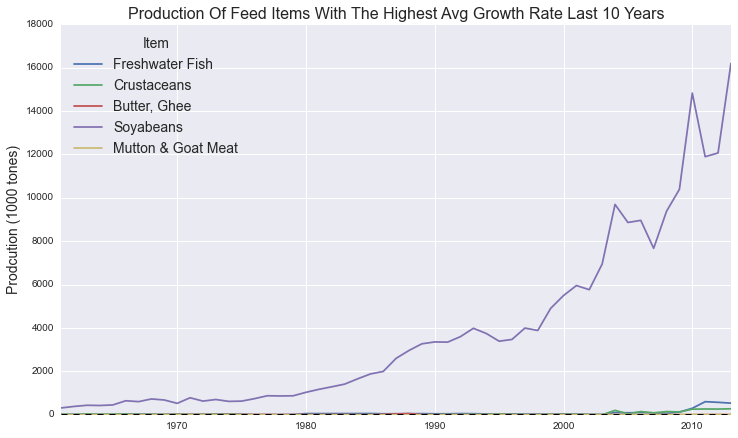

In [973]:
ax = ts_feed_item_trans.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Production Of Feed Items With The Highest Avg Growth Rate Last 10 Years')

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_ylabel('Prodcution (1000 tones)',fontsize = 14)

**The demand of Soyabeans has been incrasing over time and have a huge amount of production compared to other feed items. Around 16000000 tones of soyabeans are used for animals feed while around 100000000 are used for people consumption,so more than a half or soyabeans production worldwide are actually used for animals feed. From a side point of view, the massive increase in Soyabeans used to feed animals reflects the massive increase in our demand for meat.**

<br/>
<br/>

## Nationwide Level

### Food and Feed Production By Nation From Year 1961-2013

In [952]:
naiton_total = df.groupby('Area').sum(0).iloc[:,8:].sum(1).sort_values()
naiton_total

Area
Saint Kitts and Nevis           2102.0
Kiribati                        4406.0
Antigua and Barbuda             4446.0
Bermuda                         4933.0
Grenada                         6379.0
                               ...    
Germany                     12300442.0
Brazil                      13818239.0
India                       36549150.0
United States of America    41719176.0
China, mainland             76248859.0
Length: 146, dtype: float64

In [ ]:
ts_food_item_trans[['Cottonseed','Meat, Aquatic Mammals']]

Text(0.5, 0, 'Production (1000 tones)')

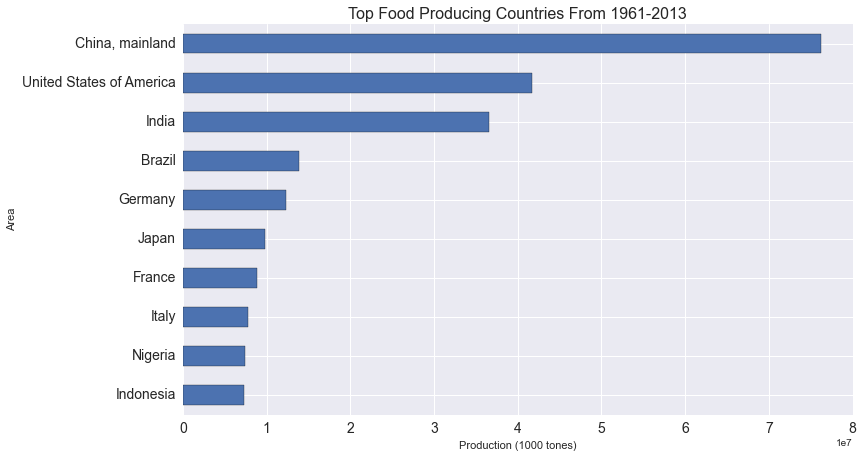

In [1450]:
ax = naiton_total.sort_values()[-10:].plot(kind = 'barh',
                                          title = 'Top Food Producing Countries From 1961-2013',
                                          fontsize = 14)
ax.set_xlabel('Production (1000 tones)')

**These major food-producing countries basically have huge populations, otherwise they have higher level of economic conditions and better climatic environment. The population determines the amount of food demand for a nation, while the economy, technology level, and climate determine the level of food production.**

Text(0.5, 2.1999999999999957, 'Production (1000 tones)')

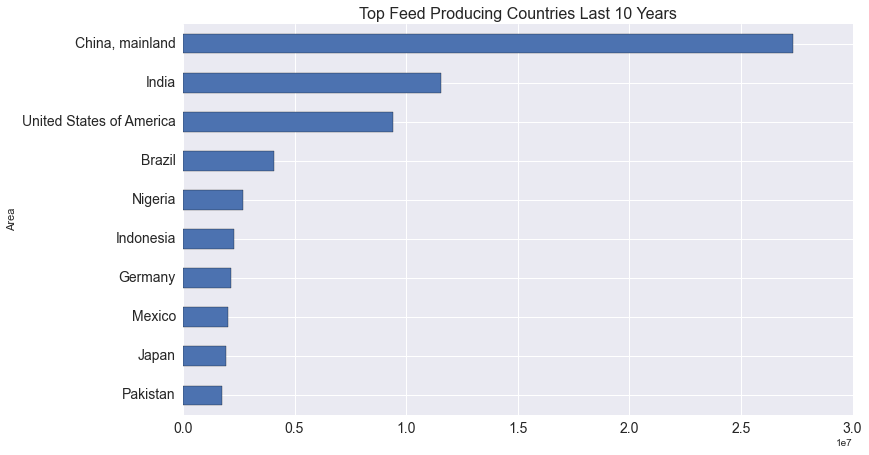

In [1449]:
last10y_nation_total = df.groupby('Area').sum(0).iloc[:,-10:].sum(1).sort_values()

last10y_nation_total.sort_values()[-10:].plot(kind = 'barh',
                                              title = 'Top Feed Producing Countries Last 10 Years',
                                              fontsize = 14)
ax.set_xlabel('Production (1000 tones)')

**Overall,the top food producing countries and top feed producing countires are pretty much the same.**

#### Time Series of Food and Feed Production of Nation 


In [858]:
nation_food_feed_ts = df.groupby(['Area','Element']).sum(0).iloc[:,7:]
stacked_data = pd.DataFrame(nation_food_feed_ts.stack()).reset_index()
stacked_data.columns = ['Area','Element','Year','Production']
stacked_data.Year = stacked_data.Year.str[1:]
stacked_data.head()

,Area,Element,Year,Production
0,Afghanistan,Feed,1961,720.0
1,Afghanistan,Feed,1962,720.0
2,Afghanistan,Feed,1963,736.0
3,Afghanistan,Feed,1964,740.0
4,Afghanistan,Feed,1965,720.0


Text(0.5, 0.98, 'Comparsion Bewtween Food and Feed Production From 1961-1963')

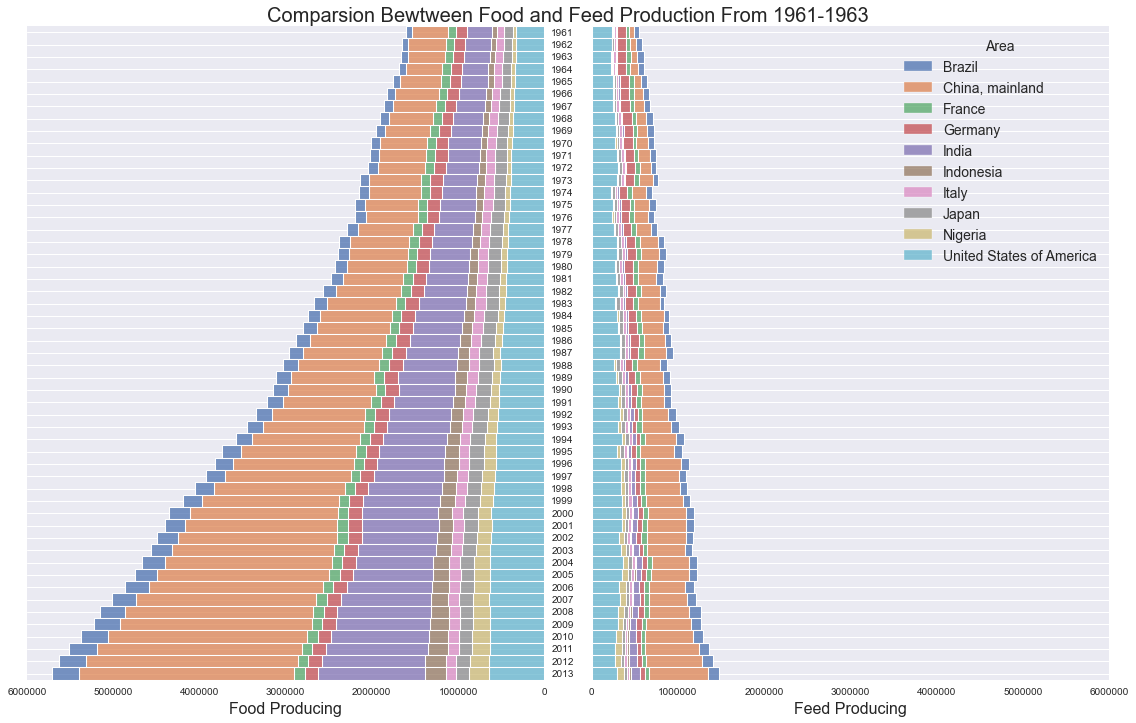

In [1311]:
stacked_food = stacked_data.loc[(stacked_data.Area.isin(naiton_total[-10:].index) & (stacked_data.Element == 'Food')),:]
stacked_feed = stacked_data.loc[(stacked_data.Area.isin(naiton_total[-10:].index) & (stacked_data.Element == 'Feed')),:]

fig, axs = plt.subplots(1,2,
                      figsize=(16,10),
                      sharey= True)

sns.histplot(y= 'Year',weights = 'Production',multiple = 'stack',hue = 'Area',data = stacked_food,
             edgecolor = 'white',ax= axs[0],legend = False,palette= 'deep')

sns.histplot(y= 'Year',weights = 'Production',multiple = 'stack',hue = 'Area',data = stacked_feed,
             edgecolor = 'white',ax= axs[1],palette= 'deep')

axs[0].set_xlim(0,6e6)
axs[1].set_xlim(0,6e6)

axs[0].set_xlabel('Food Producing',fontsize = 16)
axs[1].set_xlabel('Feed Producing',fontsize = 16)
axs[0].set_ylabel(None)
axs[0].yaxis.set_ticks_position('right')
axs[0].invert_xaxis()

fig.tight_layout()
plt.suptitle('Comparsion Bewtween Food and Feed Production From 1961-1963',fontsize = 20,va = 'bottom')


**As we can the food production is more than feed production in these counties and countires with greater food production typically with greater feed production as well.Unlike other countries, most of the food production in India is used for people consumption.**

In [1108]:
nation_food_feed_element = df.loc[:,~df.columns.isin(['Area Abbreviation', 'Area Code','Item Code',
                                                      'Element Code','latitude', 'longitude'])
                                 ].groupby(['Area','Element','Item']).sum(0).sum(1).to_frame().reset_index()


nation_food_feed_element.columns = ['Area','Element','Item','Total']

Text(0.5, 1.0, 'Major Food Across Different Countires')

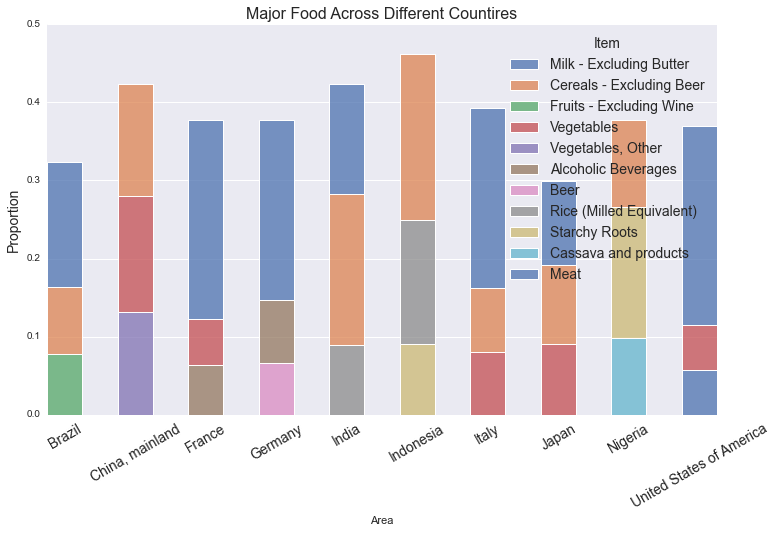

In [1371]:
nation_total_food_feed = nation_food_feed_ts.sum(1).to_frame().reset_index()
nation_total_food_feed.columns = ['Area','Element','Grand_Total']

condition = (nation_food_feed_element.Element == 'Food' )& (nation_food_feed_element.Area.isin(naiton_total[-10:].index))
nation_main_food = nation_food_feed_element.loc[condition,['Area','Item','Total']
                            ].groupby('Area').apply(lambda x: x.nlargest(3,'Total')
                                                   ).reset_index(drop=True) 

nation_main_food = nation_main_food.merge(nation_total_food_feed.loc[nation_total_food_feed.Element == 'Food'],
                                          how = 'left',right_on = "Area",left_on = 'Area').drop('Element',axis = 1)
nation_main_food['Proportion'] = nation_main_food.Total / nation_main_food.Grand_Total





sns.histplot(x = 'Area',weights= 'Proportion',data = nation_main_food,hue = 'Item',
                   multiple= 'stack',shrink= 0.5,edgecolor = 'white',palette= 'deep',linewidth=1)

plt.ylabel('Proportion',fontsize = 14)
plt.xticks(fontsize = 14,rotation = 30)

plt.title('Major Food Across Different Countires')


Text(0.5, 1.0, 'Major Feed Across Different Countires')

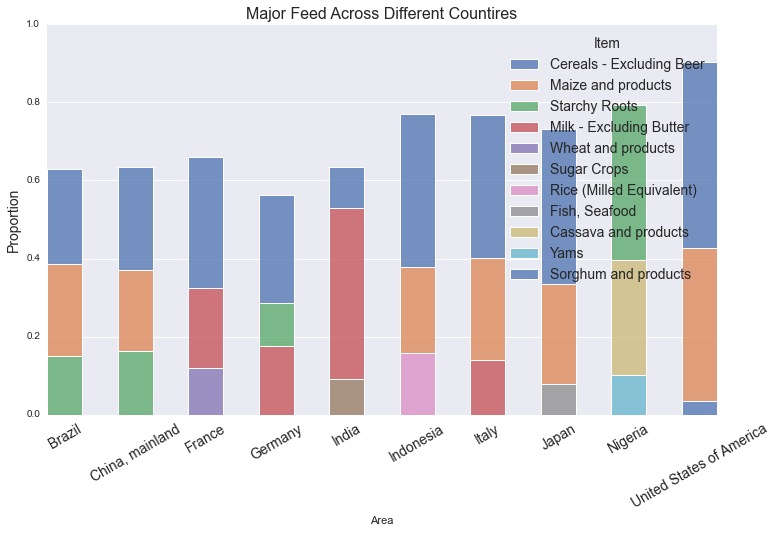

In [1370]:
condition = (nation_food_feed_element.Element == 'Feed' )& (nation_food_feed_element.Area.isin(naiton_total[-10:].index))
nation_main_feed = nation_food_feed_element.loc[condition,['Area','Item','Total']
                            ].groupby('Area').apply(lambda x: x.nlargest(3,'Total')
                                                   ).reset_index(drop=True) 

nation_main_feed = nation_main_feed.merge(nation_total_food_feed.loc[nation_total_food_feed.Element == 'Feed'],
                                          how = 'left',right_on = "Area",left_on = 'Area').drop('Element',axis = 1)
nation_main_feed['Proportion'] = nation_main_feed.Total / nation_main_feed.Grand_Total





sns.histplot(x = 'Area',weights= 'Proportion',data = nation_main_feed,hue = 'Item',
                   multiple= 'stack',shrink= 0.5,edgecolor = 'white',palette= 'deep',linewidth=1)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Proportion',fontsize = 14)
plt.xticks(fontsize = 14,rotation = 30)

plt.title('Major Feed Across Different Countires')